# Food-101 - Challenge to get >85% accurate model

In this notebook, attempt has been made to build a model that will be >85% accurate for the test set of  [Food-101](https://www.vision.ee.ethz.ch/datasets_extra/food-101/) dataset.

Fastai libraries and their built-in functions are used in this notebook.

We utilize transfer learning technique to train our model. It will be based on ResNet34 architecture model pre-trained on ImageNet dataset. Fastai library function defines our new model and loads the pre-trained weights. Our training will first train the new added layers and fine tune the entire model with our training data.

**High level steps:**
* In the Imports section, the required libraries are imported
* In the Data section, read the input and get the data ready by preparing DataBunch object
* In the Model section, create the model with base as ResNet34 using Fastai function. First train with smaller images of size 128x128 and then train the model more with images of size 256x256 and finally with size 512x512. This helps the model to train faster. It will learn high level features first and then more intricate details later with larger image sizes.
* In Results section, look at the results of the prediction using the 'Interp' class from fastai library to understand the limitations of the model/data and plan for future efforts

**Results Summary**
* With ResNet34, the accuracy is 86.7921%. We could continue training for a few more epochs to improve the accuracy as the train loss is bit higher than the Validation loss.

## Imports

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import *

## Data 

### Read Input Data

In this section we will define the file paths and read the input data into pandas dataframes. We will find out that there are 75750 images for train & validation, 25250 images for testing.

In [4]:
path = Path('../../data/Food-101/')

In [5]:
path

PosixPath('../../data/Food-101')

In [6]:
path.ls()

[PosixPath('../../data/Food-101/license_agreement.txt'),
 PosixPath('../../data/Food-101/models'),
 PosixPath('../../data/Food-101/food-101.tar.gz'),
 PosixPath('../../data/Food-101/images'),
 PosixPath('../../data/Food-101/README.txt'),
 PosixPath('../../data/Food-101/meta')]

In [7]:
path_img = path/'images'
path_meta = path/'meta'

In [8]:
train_fnames = pd.read_csv(path_meta/'train.txt', header=None)
test_fnames = pd.read_csv(path_meta/'test.txt', header=None)

In [9]:
train_fnames.head(2)

,0
0,apple_pie/1005649
1,apple_pie/1014775


In [10]:
test_fnames.head(2)

,0
0,apple_pie/1011328
1,apple_pie/101251


In [11]:
train_fnames.shape, test_fnames.shape

((75750, 1), (25250, 1))

### Build DataBunch

In this section:
* Define the DataBunch object that is required as input for building learner in fastai. The test files are used as the 'Valid' image dataset. 
* Use default get_tranform() function to do the data augmentation on images.
* Normalize image data with imagenet_stats

In [13]:
il = (ImageList.from_folder(path_img, extensions='.jpg', ))

In [14]:
il

ImageList (101000 items)
Image (3, 512, 341),Image (3, 512, 384),Image (3, 512, 512),Image (3, 512, 512),Image (3, 306, 512)
Path: ../../data/Food-101/images

In [15]:
il.items

array([PosixPath('../../data/Food-101/images/mussels/578173.jpg'),
       PosixPath('../../data/Food-101/images/mussels/3919526.jpg'),
       PosixPath('../../data/Food-101/images/mussels/3591009.jpg'),
       PosixPath('../../data/Food-101/images/mussels/3658003.jpg'), ...,
       PosixPath('../../data/Food-101/images/bread_pudding/272991.jpg'),
       PosixPath('../../data/Food-101/images/bread_pudding/242881.jpg'),
       PosixPath('../../data/Food-101/images/bread_pudding/1105735.jpg'),
       PosixPath('../../data/Food-101/images/bread_pudding/365410.jpg')], dtype=object)

In [16]:
x = test_fnames[0].str.split('/', expand=True)  #[1] #+ '.jpg'

In [17]:
test_fnames[0] = x[1] + '.jpg'

In [18]:
test_fnames.head(2)

,0
0,1011328.jpg
1,101251.jpg


In [19]:
list(test_fnames[0])

['1011328.jpg',
 '101251.jpg',
 '1034399.jpg',
 '103801.jpg',
 '1038694.jpg',
 '1047447.jpg',
 '1068632.jpg',
 '110043.jpg',
 '1106961.jpg',
 '1113017.jpg',
 '116705.jpg',
 '1167170.jpg',
 '1174330.jpg',
 '1180600.jpg',
 '1235282.jpg',
 '1269202.jpg',
 '1272958.jpg',
 '1284428.jpg',
 '1295996.jpg',
 '129668.jpg',
 '1321400.jpg',
 '1327259.jpg',
 '1332030.jpg',
 '1364847.jpg',
 '1375404.jpg',
 '1398774.jpg',
 '1420999.jpg',
 '1429866.jpg',
 '1444702.jpg',
 '1461580.jpg',
 '1469191.jpg',
 '1472631.jpg',
 '1510125.jpg',
 '1510930.jpg',
 '1514110.jpg',
 '1526484.jpg',
 '1578710.jpg',
 '1579622.jpg',
 '1579774.jpg',
 '1617515.jpg',
 '1617793.jpg',
 '1626685.jpg',
 '1629072.jpg',
 '1657587.jpg',
 '1674492.jpg',
 '168971.jpg',
 '175848.jpg',
 '1771374.jpg',
 '1773419.jpg',
 '1774036.jpg',
 '1815947.jpg',
 '1847621.jpg',
 '1854241.jpg',
 '1878082.jpg',
 '1889575.jpg',
 '1893663.jpg',
 '1899005.jpg',
 '1906009.jpg',
 '1919827.jpg',
 '2034818.jpg',
 '2038171.jpg',
 '2040919.jpg',
 '2074694.jpg',

In [20]:
sd = il.split_by_files(list(test_fnames[0]))

In [21]:
sd

ItemLists;

Train: ImageList (75750 items)
Image (3, 512, 341),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 384, 512)
Path: ../../data/Food-101/images;

Valid: ImageList (25250 items)
Image (3, 512, 384),Image (3, 306, 512),Image (3, 512, 512),Image (3, 384, 512),Image (3, 512, 382)
Path: ../../data/Food-101/images;

Test: None

In [22]:
sd.train.items[0:10]

array([PosixPath('../../data/Food-101/images/mussels/578173.jpg'),
       PosixPath('../../data/Food-101/images/mussels/3591009.jpg'),
       PosixPath('../../data/Food-101/images/mussels/3658003.jpg'),
       PosixPath('../../data/Food-101/images/mussels/3791316.jpg'),
       PosixPath('../../data/Food-101/images/mussels/182996.jpg'),
       PosixPath('../../data/Food-101/images/mussels/2540335.jpg'),
       PosixPath('../../data/Food-101/images/mussels/139711.jpg'),
       PosixPath('../../data/Food-101/images/mussels/3211688.jpg'),
       PosixPath('../../data/Food-101/images/mussels/2579587.jpg'),
       PosixPath('../../data/Food-101/images/mussels/663205.jpg')], dtype=object)

In [23]:
sd.label_from_folder()

LabelLists;

Train: LabelList (75750 items)
x: ImageList
Image (3, 512, 341),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 384, 512)
y: CategoryList
mussels,mussels,mussels,mussels,mussels
Path: ../../data/Food-101/images;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 512, 384),Image (3, 306, 512),Image (3, 512, 512),Image (3, 384, 512),Image (3, 512, 382)
y: CategoryList
mussels,mussels,mussels,mussels,mussels
Path: ../../data/Food-101/images;

Test: None

In [24]:
sd

LabelLists;

Train: LabelList (75750 items)
x: ImageList
Image (3, 512, 341),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 384, 512)
y: CategoryList
mussels,mussels,mussels,mussels,mussels
Path: ../../data/Food-101/images;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 512, 384),Image (3, 306, 512),Image (3, 512, 512),Image (3, 384, 512),Image (3, 512, 382)
y: CategoryList
mussels,mussels,mussels,mussels,mussels
Path: ../../data/Food-101/images;

Test: None

In [28]:
image_data = (sd.transform(get_transforms(), size=128)
                .databunch(bs=256)
                .normalize(imagenet_stats))

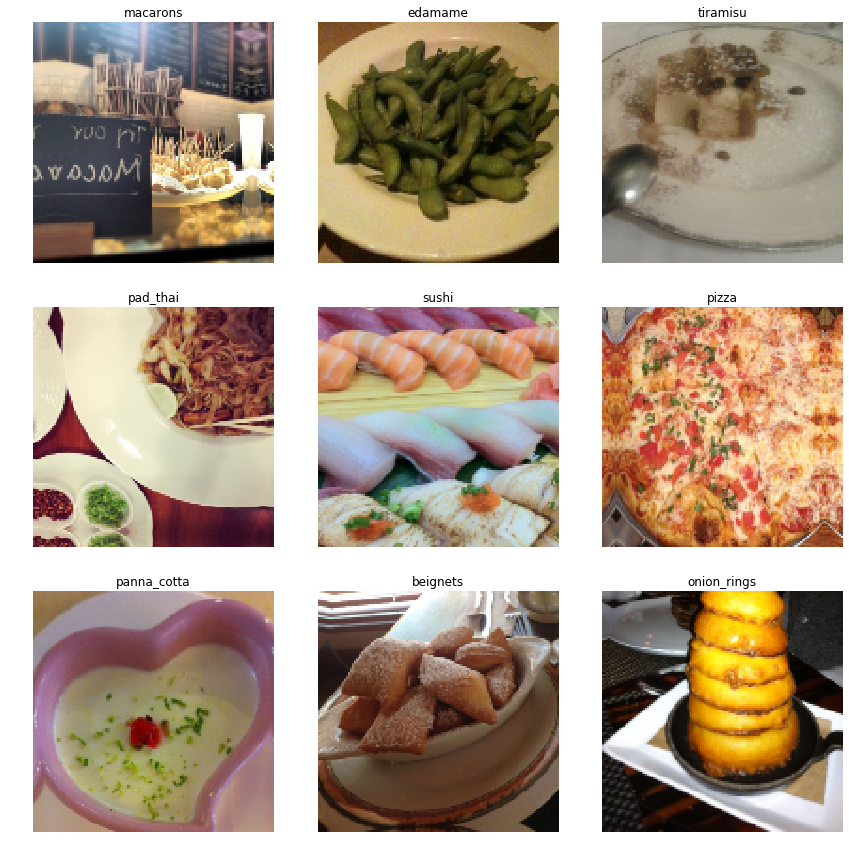

In [29]:
image_data.show_batch(rows=3, figsize=(12,12))

## Model ResNet34

### Image Size 128x128

In [31]:
data = (sd.transform(get_transforms(), size=128)
        .databunch(bs=128)
        .normalize(imagenet_stats))

In [32]:
# Free up the memory first 
learn=None
gc.collect()

18116

In [33]:
learn = cnn_learner(data, models.resnet34, path=path, metrics=accuracy).to_fp16()

In [34]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


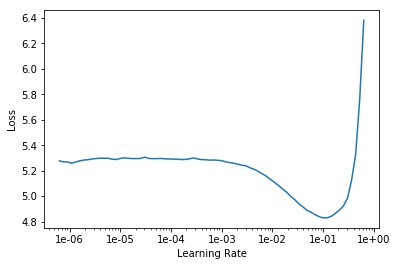

In [35]:
learn.lr_find()
learn.recorder.plot()

In [36]:
lr = 1e-2

In [37]:
learn.fit_one_cycle(4, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,2.554326,1.997201,0.481149,03:28
1,2.228792,1.670424,0.559485,03:17
2,1.993128,1.491106,0.607129,03:17
3,1.849286,1.438067,0.619168,03:16


In [38]:
learn.save("preunfreeze-rn34-128")

In [ ]:
#learn.load("preunfreeze-rn34-128")

In [39]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


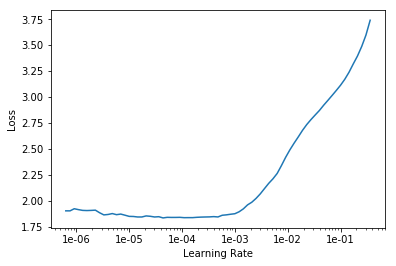

In [40]:
learn.lr_find()
learn.recorder.plot()

In [41]:
learn.fit_one_cycle(4, slice(2e-5, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,1.819152,1.391412,0.625426,03:17
1,1.566007,1.177695,0.682416,03:17
2,1.237887,0.968804,0.734455,03:16
3,0.989791,0.913447,0.748515,03:16


In [42]:
learn.save("postunfreeze-rn34-128")

### Image Size 256x256

Let us double the size of the input images to 256 and continue training the learner. This is transfer learning as the knowledge from smaller size images will be easily utiltized during the training from larger size images....Helps the model to speed up the training/learning.
Note: Decrease the batch size from 128 to 64 so that the model still fits in the GPU memory during training.

In [43]:
image_data = (sd.transform(get_transforms(), size=256)
                .databunch(bs=64)
                .normalize(imagenet_stats))

In [45]:
# Free up the memory first 
learn=None
gc.collect()

7302

In [47]:
# Build the learner, use mixed precision method so that the learner uses less memory during training.
learn = cnn_learner(image_data, models.resnet34, path=path, metrics=[accuracy]).to_fp16()

In [48]:
# Load the weights from the image size 128 training.
learn.load('postunfreeze-rn34-128')

Learner(data=ImageDataBunch;

Train: LabelList (75750 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
mussels,mussels,mussels,mussels,mussels
Path: ../../data/Food-101/images;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
mussels,mussels,mussels,mussels,mussels
Path: ../../data/Food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64,

In [49]:
#Freeze the base model weights so that only the head layers get trained initially
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


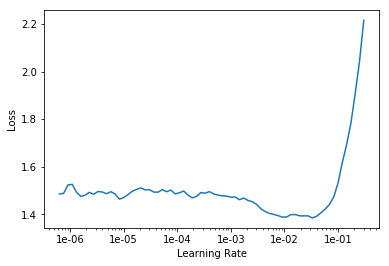

In [50]:
learn.lr_find()
learn.recorder.plot()

In [51]:
lr = 1e-3

In [52]:
learn.fit_one_cycle(4, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.094162,0.767610,0.788000,04:20
1,0.996526,0.700279,0.805386,04:19
2,0.976879,0.683872,0.809188,04:21
3,0.952084,0.679350,0.810376,04:18


In [53]:
learn.save('preunfreeze-rn34-256')

In [54]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


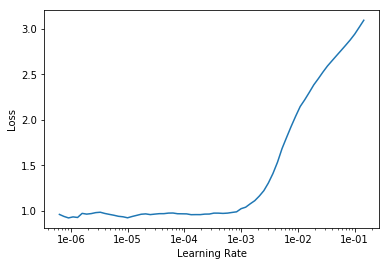

In [55]:
learn.lr_find()
learn.recorder.plot()

In [56]:
learn.fit_one_cycle(4, slice(2e-6, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.923342,0.653132,0.815327,04:32
1,0.867833,0.613558,0.828119,04:30
2,0.814457,0.587886,0.834852,04:28
3,0.723117,0.582934,0.835564,04:27


In [57]:
learn.save('postunfreeze-rn34-256')

### Image Size 512x512

Let us increase the image size to 512 and continue training....Reduce the batch size to 32 to fit the GPU memory

In [58]:
image_data = (sd.transform(get_transforms(), size=512)
                .databunch(bs=32)
                .normalize(imagenet_stats))

In [60]:
# Free up the memory first 
learn=None
gc.collect()

6996

In [61]:
# Build the learner, use mixed precision method so that the learner uses less memory during training.
learn = cnn_learner(image_data, models.resnet34, path=path, metrics=[accuracy]).to_fp16()

In [62]:
# Load the weights from the image size 256 training.
learn.load('postunfreeze-rn34-256')

Learner(data=ImageDataBunch;

Train: LabelList (75750 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
mussels,mussels,mussels,mussels,mussels
Path: ../../data/Food-101/images;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
mussels,mussels,mussels,mussels,mussels
Path: ../../data/Food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64,

In [63]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


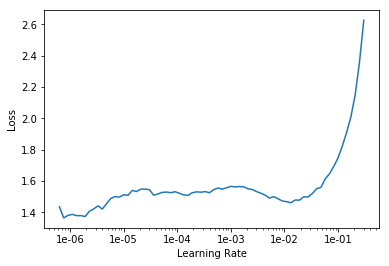

In [64]:
learn.lr_find()
learn.recorder.plot()

In [65]:
lr = 1e-3

In [66]:
learn.fit_one_cycle(4, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.128201,0.751736,0.790851,10:59
1,1.030156,0.670947,0.812990,10:57
2,0.938438,0.641845,0.820040,10:56
3,0.965304,0.639191,0.820832,10:57


In [67]:
learn.save("preunfreeze-rn34-512")

In [ ]:
#learn.load("preunfreeze-rn34-512")

In [68]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


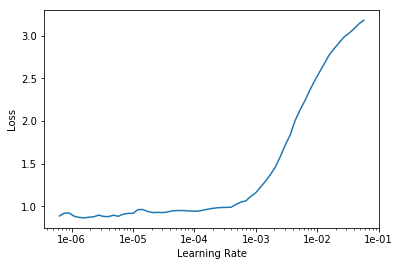

In [69]:
learn.lr_find()
learn.recorder.plot()

In [70]:
learn.fit_one_cycle(4, slice(2e-6, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.938650,0.619579,0.824713,14:15
1,0.859789,0.552670,0.842337,14:16
2,0.776168,0.515627,0.853069,14:16
3,0.700787,0.509441,0.854139,14:16


In [71]:
learn.save("postunfreeze-rn34-512")

In [72]:
learn.fit_one_cycle(6, slice(2e-6, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.691835,0.519578,0.852079,14:15
1,0.724507,0.523159,0.849703,14:16
2,0.644933,0.503867,0.856238,14:17
3,0.562535,0.479738,0.863248,14:16
4,0.508833,0.467358,0.867485,14:16
5,0.491229,0.464229,0.867921,14:16


In [73]:
learn.save("postunfreeze-rn34-512a")

## Results

Let us look at the results from the model prediction. Specifically the top losses. This will give us hints as to how we can improve the model performance. Fastai library has class interp to facilitate this step. We will first get predictions and losses for the test dataset. Then use that information to build the interp class and print the top_loss images. 

In [74]:
learn.to_fp32()

Learner(data=ImageDataBunch;

Train: LabelList (75750 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
mussels,mussels,mussels,mussels,mussels
Path: ../../data/Food-101/images;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
mussels,mussels,mussels,mussels,mussels
Path: ../../data/Food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64,

In [75]:
preds,y,losses = learn.get_preds(with_loss=True)

In [77]:
interp = ClassificationInterpretation(learn, preds, y, losses)

In [78]:
interp.top_losses(k=10)

(tensor([19.2409, 17.7495, 14.8405, 14.7313, 14.6381, 14.1657, 12.9921, 12.4047,
         11.9713, 11.8068]),
 tensor([16474,  5692, 20452, 20677,  1546,  9239, 19564,  1838, 17907, 17719]))

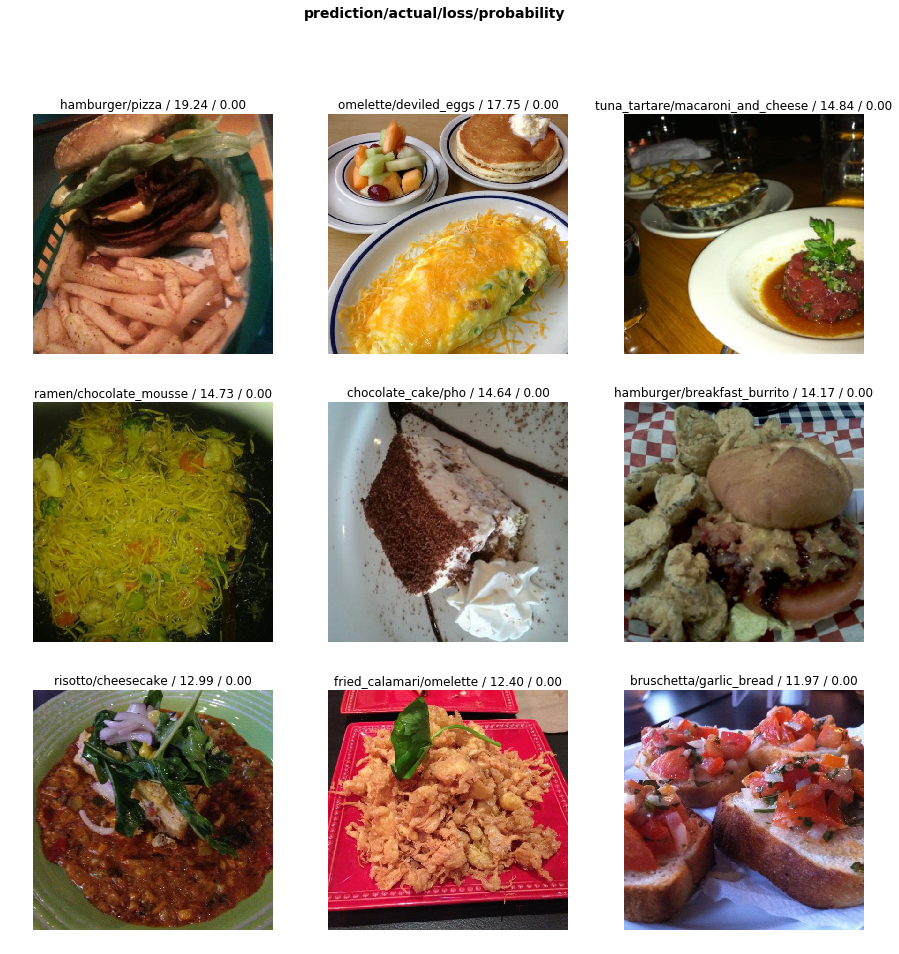

In [79]:
interp.plot_top_losses(9, figsize=(15,15), heatmap=False)

Looking at the above results, it is clear that some of the labels are wrong in the Test dataset. The model seems to be interpreting some of them correctly eventhough the labelling is wrong. This means we need a cleaner train/test dataset to improve the model.

## End